## 311 - Customer Service Request Data Analysis
#### There is no particular detail or description provided on the Open Baltimore page. 
#### However, this data is auto-refereshed more than once a day, and it includes all the service request received by any mode of communication to any District agency of the City. 
1. With my observation over first and last few rows of the data, it seems to keep a record of when a service was request and it's Due Date, and when the request is closed, along with it's mode of communication.
2. Additionally, the data also includes a column 'Agency' which specifies department for which the request is received like Fire department, Transportation, BGE, Health, General Services. 
3. Apart from above information, it also holds geographical detail along with the address of the place for which the service is requested.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("311_Customer_Service_Requests.csv",skip_blank_lines=True, nrows=1400000,
                usecols=['SRType', 'MethodReceived',
       'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate', 'CloseDate',
       'Agency', 'LastActivity', 'LastActivityDate', 'Outcome', 'Address',
       'ZipCode', 'Neighborhood', 'CouncilDistrict', 'PoliceDistrict',
       'PolicePost', 'Latitude', 'Longitude'])
len(df)

c:\users\arti\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1400000

In [3]:
df.head(50)

,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude
0,WW-Water Leak (Exterior),Phone,09/20/2019 11:49:15 AM,New,09/20/2019 11:49:15 AM,09/22/2019 11:49:15 AM,NaN,Water Wastewater,NaN,NaN,NaN,"5607 CRESCENT RIDGE DR, WHITE MARSH, 21162",21162,NaN,NaN,NaN,NaN,39.399960,-76.414382
1,FIR-Fire Smoke Alarm Installation Request,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,NaN,Fire Department,NaN,NaN,NaN,"700 CATHEDRAL ST, Baltimore City, 21201",21201,Mount Vernon,11.0,Central,NaN,39.297606,-76.617242
2,FCPF-Trial Request-Red Light,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,NaN,Finance,NaN,NaN,NaN,"200 N HOLLIDAY ST, Baltimore City, 21202",21202,Downtown,11.0,Central,NaN,39.291662,-76.610555
3,SW-Cleaning,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,NaN,Solid Waste,NaN,NaN,NaN,"3312 CARDENAS AVE, Baltimore City, 21213",21213,Belair-Edison,13.0,Northeastern,NaN,39.323134,-76.575410
4,ECC-Information Request,Phone,09/20/2019 11:47:38 AM,Closed,09/20/2019 11:47:38 AM,09/22/2019 11:47:38 AM,09/20/2019 11:48:00 AM,Call Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ECC-Information Request,Phone,09/20/2019 11:47:22 AM,Closed,09/20/2019 11:47:22 AM,09/22/2019 11:47:22 AM,09/20/2019 11:48:00 AM,Call Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HLTH-Animal Dead Animal Pickup-Wildlife or Stray,Phone,09/20/2019 11:46:35 AM,New,09/20/2019 11:46:35 AM,09/27/2019 11:46:35 AM,NaN,Health,NaN,NaN,NaN,"3912 COLBORNE RD, Baltimore City, 21229",21229,Edmondson Village,8.0,Southwestern,NaN,39.298018,-76.682242
7,RP-Park Maintenance,API,09/20/2019 11:46:01 AM,New (Duplicate),09/20/2019 11:46:00 AM,10/07/2019 11:46:01 AM,NaN,Recreation & Parks,NaN,NaN,NaN,"2767 WEGWORTH LN, BC",21230,Lakeland,10.0,Southern,NaN,39.253757,-76.641600
8,SW-Dirty Alley,Phone,09/20/2019 11:45:29 AM,New,09/20/2019 11:45:29 AM,09/27/2019 11:45:29 AM,NaN,Solid Waste,NaN,NaN,NaN,"2300 TIOGA PKWY, Baltimore City, 21215",21215,Liberty Square,7.0,Northwestern,NaN,39.319896,-76.654530
9,SW-Dirty Street,API,09/20/2019 11:44:43 AM,New,09/20/2019 11:44:43 AM,09/27/2019 11:44:43 AM,NaN,Solid Waste,NaN,NaN,NaN,"3100 BLK S HANOVER ST, Baltimore City, 20701",NaN,NaN,10.0,Southern,NaN,39.246948,-76.611316


In [4]:
df.tail(50)

,SRType,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,LastActivity,LastActivityDate,Outcome,Address,ZipCode,Neighborhood,CouncilDistrict,PoliceDistrict,PolicePost,Latitude,Longitude
1399950,SW-Dirty Street Proactive,Internal,11/30/2017 10:48:42 AM,Closed,11/30/2017 10:51:04 AM,12/07/2017 10:48:42 AM,11/30/2017 10:51:04 AM,Solid Waste,NaN,NaN,NaN,"2500 GREENMOUNT AVE, BALTIMORE, MD, 21218",21218,Harwood,12.0,Northern,513,39.318149,-76.609531
1399951,TEC-Footways Contract/Reconstruction,Phone,11/30/2017 10:48:34 AM,Closed,02/08/2018 05:59:18 AM,NaN,02/08/2018 05:59:16 AM,Transportation,NaN,NaN,NaN,"2432 FRANCIS ST, BALTIMORE, MD, 21217",21217,Penn North,7.0,Western,733,39.311665,-76.640799
1399952,SW-Graffiti Removal Proactive,Internal,11/30/2017 10:48:28 AM,Closed,12/01/2017 05:41:09 AM,11/30/2017 10:48:28 AM,12/01/2017 05:41:08 AM,Solid Waste,NaN,NaN,NaN,"2502 N CALVERT ST, BALTIMORE, MD, 21218",21218,Charles Village,12.0,Northern,512,39.318395,-76.614326
1399953,SW-Dirty Street Proactive,Internal,11/30/2017 10:48:24 AM,Closed,11/30/2017 10:48:26 AM,12/07/2017 10:48:24 AM,11/30/2017 10:48:24 AM,Solid Waste,NaN,NaN,NaN,"400 E 25TH ST, BALTIMORE, MD, 21218",21218,Harwood,12.0,Northern,513,39.318269,-76.610965
1399954,SW-Dirty Street Proactive,Internal,11/30/2017 10:48:13 AM,Closed,11/30/2017 10:52:11 AM,12/07/2017 10:48:13 AM,11/30/2017 10:52:10 AM,Solid Waste,NaN,NaN,NaN,"2400 GREENMOUNT AVE, BALTIMORE, MD, 21218",21218,Barclay,12.0,Eastern,341,39.316331,-76.609658
1399955,TEC-Footways Contract/Reconstruction,Phone,11/30/2017 10:48:08 AM,Closed,02/08/2018 05:56:52 AM,NaN,02/08/2018 05:56:51 AM,Transportation,NaN,NaN,NaN,"2431 FRANCIS ST, BALTIMORE, MD, 21217",21217,Penn North,7.0,Western,733,39.311997,-76.640804
1399956,TEC-Footways Contract/Reconstruction,Phone,11/30/2017 10:47:25 AM,Closed,02/08/2018 05:55:18 AM,NaN,02/08/2018 05:55:17 AM,Transportation,NaN,NaN,NaN,"2430 FRANCIS ST, BALTIMORE, MD, 21217",21217,Penn North,7.0,Western,733,39.311634,-76.640767
1399957,SW-Dirty Alley,API,11/30/2017 10:47:17 AM,Closed,12/04/2017 05:01:05 AM,12/07/2017 10:47:17 AM,12/04/2017 05:01:04 AM,Solid Waste,NaN,NaN,NaN,"3816 W GARRISON AVE, BALTIMORE, MD, 21215",21215,Langston Hughes,6.0,Northwestern,613,39.343615,-76.680146
1399958,SW-Graffiti Removal Proactive,Internal,11/30/2017 10:47:11 AM,Closed,12/01/2017 05:28:58 AM,11/30/2017 10:47:11 AM,12/01/2017 05:28:57 AM,Solid Waste,NaN,NaN,NaN,"2504 N CALVERT ST, BALTIMORE, MD, 21218",21218,Charles Village,12.0,Northern,512,39.318470,-76.614435
1399959,TRM-WO Sign Installation,Phone,11/30/2017 10:47:10 AM,Closed,01/31/2018 03:44:17 AM,12/30/2017 10:47:10 AM,01/31/2018 03:44:16 AM,Transportation,NaN,NaN,NaN,"1428 E COLD SPRING LN, BALTIMORE, MD, 21239",21239,New Northwood,4.0,Northeastern,413,39.346380,-76.593121


#### Dropping few of the columns in read itself, to rescue from MemoryError later
###### All the columns in dataset are
Index(['SRRecordID', 'ServiceRequestNum', 'SRType', 'MethodReceived',
       'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate', 'CloseDate',
       'Agency', 'LastActivity', 'LastActivityDate', 'Outcome', 'Address',
       'ZipCode', 'Neighborhood', 'CouncilDistrict', 'PoliceDistrict',
       'PolicePost', 'Latitude', 'Longitude', 'GeoLocation'],
      dtype='object')

## Observation from above result after looking at head(50) and tail(50)
1. CloseDate is 'NaN' for all the requests which are not closed.
2. Looking at first 50 rows, I observed that all the request with closed status had all columns with NaN. However, this was proved wrong looking at the last 50 rows.
3. Closing looking at those closed status entries with no values, seems to be some information request call, only.
4. Another important observation made is that the data seems to have considerable amount of NaN, and need to look at if that willimpact.
5. Outcome columns has all rows NaN in this observation.

##### From above rows, I believe that below possible observation can be made -
1. which department received more Service Request? (Agency column)
2. from which area/location more requests received? (PoliceDistrict/CouncilDistrict/ZipCode)
3. what time of the day the calls are made more? (CreatedDate)
4. Are there any delay in closing request, if so which department request is delayed more? (DueDate/CloseDate, Agency)
5. Whats the mode of receiving service request?
6. Area and mode of communication may be some relation?
7. Agency and Mode of comm may be some relation?

### Selecting Columns
1. Service request seems to merge into Agency, this may narrows down the result, so may be we can drop this column.
2. Also, SRRecordID, ServiceRequestNum are just unique number being assigned to each records. Wouldn't be helpful as an attribute.
3. Also taking only ZipCode, CouncilDistrict, PoliceDistrict for the location information, as Address is too detailed, and same as 'Latitude', 'Longitude', 'GeoLocation'.
4. Also 'PolicePost' also being dropped, since the PoliceDistrict and PolicePost seems to map to each other.


In [5]:
# df.drop('SRRecordID',axis=1,inplace=True)

In [6]:
# df.drop('ServiceRequestNum', axis=1, inplace=True)

In [7]:
df.drop('SRType', axis=1, inplace=True)

In [8]:
df.drop('LastActivity', axis=1, inplace=True)

In [9]:
df.drop('LastActivityDate', axis=1, inplace=True)

In [10]:
df.drop('Outcome', axis=1, inplace=True)

In [11]:
df.drop('Address', axis=1, inplace=True)

In [12]:
df.drop('Neighborhood', axis=1, inplace=True)

In [13]:
df.drop('PolicePost', axis=1, inplace=True)

In [14]:
df.drop('Latitude', axis=1, inplace=True)

In [15]:
df.drop('Longitude', axis=1, inplace=True)

In [16]:
# df.drop('GeoLocation', axis=1, inplace=True)

df = pd.read_csv("311_Customer_Service_Requests.csv",skip_blank_lines=True, nrows=1400000,
                 usecols=['MethodReceived', 'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate',
       'CloseDate', 'Agency', 'ZipCode', 'CouncilDistrict', 'PoliceDistrict',
       'Latitude', 'Longitude'])
len(df)

In [17]:
df.columns

Index(['MethodReceived', 'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate',
       'CloseDate', 'Agency', 'ZipCode', 'CouncilDistrict', 'PoliceDistrict'],
      dtype='object')

In [18]:
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
0,Phone,09/20/2019 11:49:15 AM,New,09/20/2019 11:49:15 AM,09/22/2019 11:49:15 AM,NaN,Water Wastewater,21162,NaN,NaN
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,NaN,Fire Department,21201,11.0,Central
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,NaN,Finance,21202,11.0,Central
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,NaN,Solid Waste,21213,13.0,Northeastern
4,Phone,09/20/2019 11:47:38 AM,Closed,09/20/2019 11:47:38 AM,09/22/2019 11:47:38 AM,09/20/2019 11:48:00 AM,Call Center,NaN,NaN,NaN


In [19]:
df.tail()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
1399995,Phone,11/30/2017 10:39:03 AM,Closed,12/01/2017 06:30:48 AM,12/07/2017 10:39:03 AM,12/01/2017 06:30:48 AM,Health,21206,2.0,Northeastern
1399996,Internal,11/30/2017 10:39:01 AM,Closed,11/30/2017 10:40:03 AM,12/07/2017 10:39:01 AM,11/30/2017 10:40:03 AM,Solid Waste,21218,12.0,Eastern
1399997,Phone,11/30/2017 10:39:00 AM,Closed,11/30/2017 12:12:22 PM,12/03/2017 10:39:00 AM,11/30/2017 12:12:22 PM,Solid Waste,21207,5.0,Northwestern
1399998,Internal,11/30/2017 10:38:46 AM,Closed,11/30/2017 10:45:17 AM,12/07/2017 10:38:46 AM,11/30/2017 10:45:16 AM,Solid Waste,21218,12.0,Eastern
1399999,Phone,11/30/2017 10:38:40 AM,Closed,11/30/2017 10:38:53 AM,12/07/2017 10:38:40 AM,11/30/2017 10:38:52 AM,Solid Waste,21224,1.0,Southeastern


### Let's first check for duplicates if any

In [20]:
len(df) - len(df.drop_duplicates())

1110

#### Let's view few duplicate record

In [21]:
df[df.duplicated()].head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
1839,Mail,09/19/2019 03:16:48 PM,New,09/19/2019 03:16:48 PM,10/19/2019 03:16:48 PM,NaN,Finance,21202,11.0,Central
25761,Mail,09/11/2019 04:05:49 PM,New,09/11/2019 04:05:49 PM,10/11/2019 04:05:49 PM,NaN,Finance,21202,11.0,Central
32337,System,09/09/2019 04:17:30 PM,Closed,09/09/2019 04:21:45 PM,09/14/2019 04:17:30 PM,09/09/2019 04:22:55 PM,Solid Waste,21215,5.0,Northwestern
32338,System,09/09/2019 04:17:30 PM,Closed,09/09/2019 04:21:45 PM,09/14/2019 04:17:30 PM,09/09/2019 04:22:55 PM,Solid Waste,21215,5.0,Northwestern
32344,System,09/09/2019 04:16:55 PM,Closed,09/09/2019 04:21:45 PM,09/14/2019 04:16:55 PM,09/09/2019 04:22:55 PM,Solid Waste,21215,5.0,Northwestern


##### Let's drop the duplicate records.

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
len(df) - len(df.drop_duplicates())

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398890 entries, 0 to 1399999
Data columns (total 10 columns):
MethodReceived     1398890 non-null object
CreatedDate        1398890 non-null object
SRStatus           1398890 non-null object
StatusDate         1398890 non-null object
DueDate            1363082 non-null object
CloseDate          1316378 non-null object
Agency             1398778 non-null object
ZipCode            1299060 non-null object
CouncilDistrict    1282886 non-null float64
PoliceDistrict     1282209 non-null object
dtypes: float64(1), object(9)
memory usage: 69.4+ MB


In [25]:
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
0,Phone,09/20/2019 11:49:15 AM,New,09/20/2019 11:49:15 AM,09/22/2019 11:49:15 AM,NaN,Water Wastewater,21162,NaN,NaN
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,NaN,Fire Department,21201,11.0,Central
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,NaN,Finance,21202,11.0,Central
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,NaN,Solid Waste,21213,13.0,Northeastern
4,Phone,09/20/2019 11:47:38 AM,Closed,09/20/2019 11:47:38 AM,09/22/2019 11:47:38 AM,09/20/2019 11:48:00 AM,Call Center,NaN,NaN,NaN


### Now, let's work with each of the columns data

### Column 1 - Agency

In [26]:
df['Agency'].value_counts()

Solid Waste           677101
Transportation        206052
Housing               152012
Water Wastewater      103042
Call Center            82141
BGE                    47011
Finance                46834
Health                 37241
Recreation & Parks     24355
Fire Department        18136
Parking Authority       2323
Liquor Board            1496
Public Works             516
Police Department        178
BCIT                     169
Mayor's Office           114
General Services          51
City Council               6
Name: Agency, dtype: int64

In [27]:
len(df[df['Agency'].isna()])

112

##### Let's change NaN in Agency to UNK (Unknown)

In [28]:
df['Agency'].fillna('UNK', inplace=True)
len(df[df['Agency'].isna()])

0

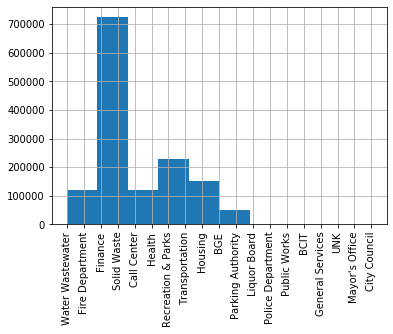

In [29]:
df['Agency'].hist(xrot=90)

##### From above graph, most of the request received are for 'Solid Waste'

In [30]:
df.tail()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
1399995,Phone,11/30/2017 10:39:03 AM,Closed,12/01/2017 06:30:48 AM,12/07/2017 10:39:03 AM,12/01/2017 06:30:48 AM,Health,21206,2.0,Northeastern
1399996,Internal,11/30/2017 10:39:01 AM,Closed,11/30/2017 10:40:03 AM,12/07/2017 10:39:01 AM,11/30/2017 10:40:03 AM,Solid Waste,21218,12.0,Eastern
1399997,Phone,11/30/2017 10:39:00 AM,Closed,11/30/2017 12:12:22 PM,12/03/2017 10:39:00 AM,11/30/2017 12:12:22 PM,Solid Waste,21207,5.0,Northwestern
1399998,Internal,11/30/2017 10:38:46 AM,Closed,11/30/2017 10:45:17 AM,12/07/2017 10:38:46 AM,11/30/2017 10:45:16 AM,Solid Waste,21218,12.0,Eastern
1399999,Phone,11/30/2017 10:38:40 AM,Closed,11/30/2017 10:38:53 AM,12/07/2017 10:38:40 AM,11/30/2017 10:38:52 AM,Solid Waste,21224,1.0,Southeastern


### Column 2 - MethodReceived

In [31]:
df['MethodReceived'].value_counts()

Phone        650977
API          374679
Internal     280292
System        55585
Mail          34745
Email          2091
Other           338
Web             140
Community        37
Chat              4
Twitter           2
Name: MethodReceived, dtype: int64

In [32]:
len(df[df['MethodReceived'].isna()])

0

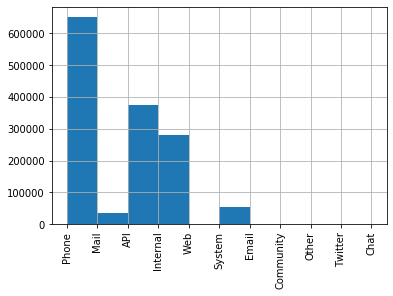

In [33]:
df['MethodReceived'].hist(xrot=90)

##### Most of the requests are received through Phone

### Column 3 - PoliceDistrict

In [34]:
df['PoliceDistrict'].value_counts()

Northeastern    193044
Southeastern    164202
Northern        156541
Southern        150979
Southwestern    148110
Northwestern    134249
Western         119958
Eastern         115855
Central          98733
CENTRAL            110
EAST               105
WEST                76
NORTHEASTERN        57
SOUTHEASTERN        54
EASTERN             44
WESTERN             30
SOUTHWESTERN        28
NORTHERN            21
NORTHWESTERN        13
Name: PoliceDistrict, dtype: int64

##### We can normalize this column values to all upper-case, but let's check for NaN before that.

In [35]:
len(df[df['PoliceDistrict'].isna()])

116681

#### Let's drop NaN records, since 178357 << 2398000

In [36]:
df.dropna(subset=['PoliceDistrict'],inplace=True)
len(df)

1282209

In [37]:
len(df[df['PoliceDistrict'].isna()])

0

In [38]:
df['PoliceDistrict']=df['PoliceDistrict'].apply(lambda dist:dist.upper())

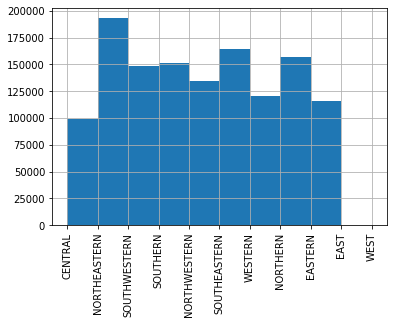

In [39]:
df['PoliceDistrict'].hist(xrot=90)

###### it can be said that request are normally distributed over all the area of Baltimore city

In [40]:
df.tail()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
1399995,Phone,11/30/2017 10:39:03 AM,Closed,12/01/2017 06:30:48 AM,12/07/2017 10:39:03 AM,12/01/2017 06:30:48 AM,Health,21206,2.0,NORTHEASTERN
1399996,Internal,11/30/2017 10:39:01 AM,Closed,11/30/2017 10:40:03 AM,12/07/2017 10:39:01 AM,11/30/2017 10:40:03 AM,Solid Waste,21218,12.0,EASTERN
1399997,Phone,11/30/2017 10:39:00 AM,Closed,11/30/2017 12:12:22 PM,12/03/2017 10:39:00 AM,11/30/2017 12:12:22 PM,Solid Waste,21207,5.0,NORTHWESTERN
1399998,Internal,11/30/2017 10:38:46 AM,Closed,11/30/2017 10:45:17 AM,12/07/2017 10:38:46 AM,11/30/2017 10:45:16 AM,Solid Waste,21218,12.0,EASTERN
1399999,Phone,11/30/2017 10:38:40 AM,Closed,11/30/2017 10:38:53 AM,12/07/2017 10:38:40 AM,11/30/2017 10:38:52 AM,Solid Waste,21224,1.0,SOUTHEASTERN


#### Column 4 - CouncilDistrict

In [41]:
df['CouncilDistrict'].value_counts()

9.0     137080
12.0    117894
7.0     114982
11.0    114975
1.0     111161
10.0    107322
13.0    101413
6.0      84704
8.0      76029
14.0     70975
4.0      67978
3.0      62243
2.0      59951
5.0      55317
Name: CouncilDistrict, dtype: int64

#### Let's check for NaN records

In [42]:
len(df[df['CouncilDistrict'].isna()])

185

In [43]:
df.dropna(subset=['CouncilDistrict'],inplace=True)
len(df[df['CouncilDistrict'].isna()])

0

##### value looks in float, so let's check are they float or only an integer code may be. If an integer code, may be we can convert it to INT.

In [44]:
df[df['CouncilDistrict'].notnull() & (round(df.CouncilDistrict) - df.CouncilDistrict) != 0.0]

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict


In [45]:
df['CouncilDistrict'] = df['CouncilDistrict'].astype(int)
df['CouncilDistrict'].head()

1    11
2    11
3    13
6     8
7    10
Name: CouncilDistrict, dtype: int32

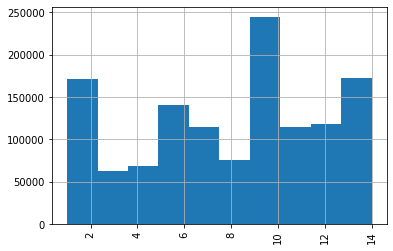

In [46]:
df['CouncilDistrict'].hist(xrot=90)

###### Most request are received for Council 1, 3, 5, 9

### Let's take a look at the dataset now

In [47]:
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,NaN,Fire Department,21201,11,CENTRAL
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,NaN,Finance,21202,11,CENTRAL
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,NaN,Solid Waste,21213,13,NORTHEASTERN
6,Phone,09/20/2019 11:46:35 AM,New,09/20/2019 11:46:35 AM,09/27/2019 11:46:35 AM,NaN,Health,21229,8,SOUTHWESTERN
7,API,09/20/2019 11:46:01 AM,New (Duplicate),09/20/2019 11:46:00 AM,10/07/2019 11:46:01 AM,NaN,Recreation & Parks,21230,10,SOUTHERN


### Column 5 - CreatedDates and ClosedDates Column

In [48]:
len(df[df['CreatedDate'].isna()])

0

In [49]:
len(df[df['CloseDate'].isna()])

79273

In [50]:
len(df[df['CloseDate'].isna() & df['SRStatus'].str.contains('Close')])

0

#### So, 89984 records with no CloseDate are not the closed ones. That seems to be reasonable. Let's replace it with HIGH value

In [51]:
df['CloseDate'].fillna('99/99/9999 99:99:99 PM', inplace=True)
len(df[df['CloseDate'].isna()])

0

#### Let's take out month and Year from the CreatedDate

In [52]:
df['Month Year'] = df['CreatedDate'].apply(lambda date: (str(date)[0:2] + ', ' + str(date)[6:10]))
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict,Month Year
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,99/99/9999 99:99:99 PM,Fire Department,21201,11,CENTRAL,"09, 2019"
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,99/99/9999 99:99:99 PM,Finance,21202,11,CENTRAL,"09, 2019"
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,99/99/9999 99:99:99 PM,Solid Waste,21213,13,NORTHEASTERN,"09, 2019"
6,Phone,09/20/2019 11:46:35 AM,New,09/20/2019 11:46:35 AM,09/27/2019 11:46:35 AM,99/99/9999 99:99:99 PM,Health,21229,8,SOUTHWESTERN,"09, 2019"
7,API,09/20/2019 11:46:01 AM,New (Duplicate),09/20/2019 11:46:00 AM,10/07/2019 11:46:01 AM,99/99/9999 99:99:99 PM,Recreation & Parks,21230,10,SOUTHERN,"09, 2019"


##### Let's take out at which hour of the day the request are more received

In [53]:
df['Hour'] = df['CreatedDate'].apply(lambda time: int(time[11:13]) if time[20:22] == 'AM' else (int(time[11:13]) + 12))
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict,Month Year,Hour
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,99/99/9999 99:99:99 PM,Fire Department,21201,11,CENTRAL,"09, 2019",11
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,99/99/9999 99:99:99 PM,Finance,21202,11,CENTRAL,"09, 2019",11
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,99/99/9999 99:99:99 PM,Solid Waste,21213,13,NORTHEASTERN,"09, 2019",11
6,Phone,09/20/2019 11:46:35 AM,New,09/20/2019 11:46:35 AM,09/27/2019 11:46:35 AM,99/99/9999 99:99:99 PM,Health,21229,8,SOUTHWESTERN,"09, 2019",11
7,API,09/20/2019 11:46:01 AM,New (Duplicate),09/20/2019 11:46:00 AM,10/07/2019 11:46:01 AM,99/99/9999 99:99:99 PM,Recreation & Parks,21230,10,SOUTHERN,"09, 2019",11


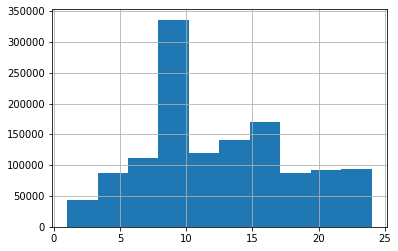

In [54]:
df['Hour'].hist()

### Important Observation: 
1. Most of the service request are made during the morning hours 9 am - 10 am, and then during the late afternoon time 3 pm - 4 pm

In [55]:
import datetime as dt
# df['CreatedDate'].apply(lambda time: dt.datetime.strptime(time[0:10],'%m/%d/%Y')).dt.dayofweek
df['DayofWeek'] = df['CreatedDate'].apply(lambda time: dt.datetime.strptime(time[0:10],'%m/%d/%Y')).dt.dayofweek
# df['DayofWeek'] = df['CloseDate'].apply(lambda date: (str(date)[0:2] + ', ' + str(date)[6:10]))
df.head()

,MethodReceived,CreatedDate,SRStatus,StatusDate,DueDate,CloseDate,Agency,ZipCode,CouncilDistrict,PoliceDistrict,Month Year,Hour,DayofWeek
1,Phone,09/20/2019 11:48:58 AM,New,09/20/2019 11:48:58 AM,09/27/2019 11:48:58 AM,99/99/9999 99:99:99 PM,Fire Department,21201,11,CENTRAL,"09, 2019",11,4
2,Mail,09/20/2019 11:48:07 AM,New,09/20/2019 11:48:07 AM,10/20/2019 11:48:07 AM,99/99/9999 99:99:99 PM,Finance,21202,11,CENTRAL,"09, 2019",11,4
3,API,09/20/2019 11:48:03 AM,Open,09/20/2019 11:48:03 AM,10/20/2019 11:48:03 AM,99/99/9999 99:99:99 PM,Solid Waste,21213,13,NORTHEASTERN,"09, 2019",11,4
6,Phone,09/20/2019 11:46:35 AM,New,09/20/2019 11:46:35 AM,09/27/2019 11:46:35 AM,99/99/9999 99:99:99 PM,Health,21229,8,SOUTHWESTERN,"09, 2019",11,4
7,API,09/20/2019 11:46:01 AM,New (Duplicate),09/20/2019 11:46:00 AM,10/07/2019 11:46:01 AM,99/99/9999 99:99:99 PM,Recreation & Parks,21230,10,SOUTHERN,"09, 2019",11,4


In [56]:
df.drop('CreatedDate',axis=1,inplace=True)

In [57]:
df.drop('CloseDate',axis=1,inplace=True)

In [58]:
df.drop('StatusDate',axis=1,inplace=True)

In [59]:
df.drop('ZipCode',axis=1,inplace=True)

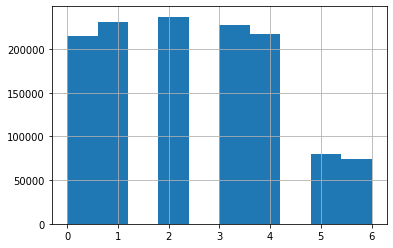

In [60]:
df['DayofWeek'].hist()

#### Observation from above and the plot before: 
1. Most of the request are received during the weekdays, mostly on Wednesday then Tuesdays and Thursdays, in early morning hours. Mon and Fri also received lot of request. 
2. However, over the weekend, very few requests are received compared to other days.

In [61]:
df.drop('DueDate',axis=1,inplace=True)

In [62]:
df.head()

,MethodReceived,SRStatus,Agency,CouncilDistrict,PoliceDistrict,Month Year,Hour,DayofWeek
1,Phone,New,Fire Department,11,CENTRAL,"09, 2019",11,4
2,Mail,New,Finance,11,CENTRAL,"09, 2019",11,4
3,API,Open,Solid Waste,13,NORTHEASTERN,"09, 2019",11,4
6,Phone,New,Health,8,SOUTHWESTERN,"09, 2019",11,4
7,API,New (Duplicate),Recreation & Parks,10,SOUTHERN,"09, 2019",11,4


### Let's change each column to categorical value to a new Dataframe

In [63]:
lbl = LabelEncoder()
df['PoliceDistrict_Code'] = lbl.fit_transform(df['PoliceDistrict'].astype(str))
# df[['PoliceDistrict', 'PoliceDistrict_Code']].head(11)

In [64]:
police_dist_map = dict(zip(lbl.transform(lbl.classes_),lbl.classes_))
print(police_dist_map)

{0: 'CENTRAL', 1: 'EASTERN', 2: 'NORTHEASTERN', 3: 'NORTHERN', 4: 'NORTHWESTERN', 5: 'SOUTHEASTERN', 6: 'SOUTHERN', 7: 'SOUTHWESTERN', 8: 'WESTERN'}


In [65]:
df.drop('PoliceDistrict',axis=1,inplace=True)

In [66]:
lbl = LabelEncoder()
df['SRStatus_Code'] = lbl.fit_transform(df['SRStatus'].astype(str))

In [67]:
status_map = dict(zip(lbl.transform(lbl.classes_),lbl.classes_))
print(status_map)

{0: 'Closed', 1: 'Closed (Duplicate)', 2: 'Closed (Transferred)', 3: 'Hold', 4: 'Hold (Duplicate)', 5: 'In Progress', 6: 'In Progress (Duplicate)', 7: 'New', 8: 'New (Duplicate)', 9: 'Open', 10: 'Open (Duplicate)', 11: 'Pending', 12: 'Pending (Duplicate)'}


In [68]:
df.drop('SRStatus',axis=1,inplace=True)

In [69]:
lbl = LabelEncoder()
df['Agency_Code'] = lbl.fit_transform(df['Agency'].astype(str))

In [70]:
agency_map = dict(zip(lbl.transform(lbl.classes_),lbl.classes_))
print(agency_map)

{0: 'BCIT', 1: 'BGE', 2: 'Call Center', 3: 'City Council', 4: 'Finance', 5: 'Fire Department', 6: 'General Services', 7: 'Health', 8: 'Housing', 9: 'Liquor Board', 10: "Mayor's Office", 11: 'Parking Authority', 12: 'Police Department', 13: 'Public Works', 14: 'Recreation & Parks', 15: 'Solid Waste', 16: 'Transportation', 17: 'UNK', 18: 'Water Wastewater'}


In [71]:
df.drop('Agency',axis=1,inplace=True)

In [72]:
df.head()

,MethodReceived,CouncilDistrict,Month Year,Hour,DayofWeek,PoliceDistrict_Code,SRStatus_Code,Agency_Code
1,Phone,11,"09, 2019",11,4,0,7,5
2,Mail,11,"09, 2019",11,4,0,7,4
3,API,13,"09, 2019",11,4,2,9,15
6,Phone,8,"09, 2019",11,4,7,7,7
7,API,10,"09, 2019",11,4,6,8,14


In [73]:
lbl = LabelEncoder()
df['MethodReceived_Code'] = lbl.fit_transform(df['MethodReceived'].astype(str))

In [74]:
method_map = dict(zip( lbl.transform(lbl.classes_),lbl.classes_))
print(method_map)

{0: 'API', 1: 'Chat', 2: 'Community', 3: 'Email', 4: 'Internal', 5: 'Mail', 6: 'Other', 7: 'Phone', 8: 'System', 9: 'Twitter', 10: 'Web'}


In [75]:
df.drop('MethodReceived',axis=1,inplace=True)

In [76]:
df.head()

,CouncilDistrict,Month Year,Hour,DayofWeek,PoliceDistrict_Code,SRStatus_Code,Agency_Code,MethodReceived_Code
1,11,"09, 2019",11,4,0,7,5,7
2,11,"09, 2019",11,4,0,7,4,5
3,13,"09, 2019",11,4,2,9,15,0
6,8,"09, 2019",11,4,7,7,7,7
7,10,"09, 2019",11,4,6,8,14,0


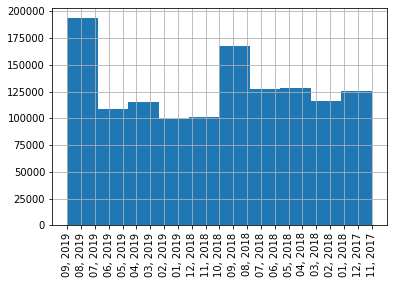

In [77]:
df['Month Year'].hist(xrot=90)

### Observation from above graph: 
1. An observation can be made that highest number of request are made during the August-September months of the Year, as we can see the repeated pattern in 2018 and 2019 years. 
2. It can be due to the transition of weather from summer to winter.

In [78]:
df.drop('Month Year',axis=1,inplace=True)

In [79]:
df.head()

,CouncilDistrict,Hour,DayofWeek,PoliceDistrict_Code,SRStatus_Code,Agency_Code,MethodReceived_Code
1,11,11,4,0,7,5,7
2,11,11,4,0,7,4,5
3,13,11,4,2,9,15,0
6,8,11,4,7,7,7,7
7,10,11,4,6,8,14,0


## ScatterPlot with 3-D plots
###### Points to Note
1. Each Code - Label Relation Label is at the end of the plots.
2. For Day of Week starts at 0 - Monday and ends at 6 - Sunday.

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

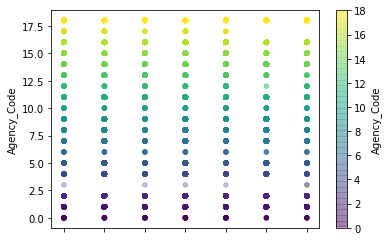

In [81]:
df.plot.scatter(y='Agency_Code',x='DayofWeek',c='Agency_Code',cmap='viridis',alpha=0.3)

#### Observation-
- Request for each Agency is normally distributed over the week.
- Another inference made from this observation is that Agency with Code 17 (UNK) and 3 (City Council) has no to very little request received over the weekend.

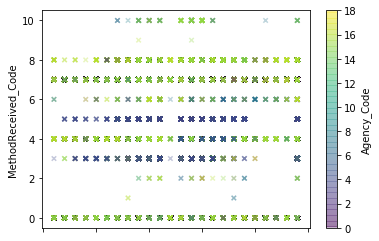

In [82]:
df.plot.scatter(x='Hour',y='MethodReceived_Code',c='Agency_Code',cmap='viridis',alpha=0.3,marker='x')

#### Observation-
- There exist a clear relationship between Agency and how the request is received for that agency, however it doesn't have to do anything with the hour.
- Looking at the dark blue line, we can infer that for Housing, Finance, General Services departments receives service request either through mail or email, may be because it can provide more detail info and not need an immediate attention.
- Similarly, there are green lines with very few blue dots with Method of 0, 4, 6, 7 and 8. It can be inferred from these that, Police Department, Solid Waste, Transportation, Water waste receives service request more through Phone, System, API or internally. 
- And the blue dots among these may indicate Fire Department which also receives request via Phone or System, due to it's urgency may be.

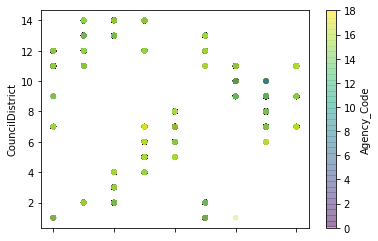

In [83]:
df.plot.scatter(y='CouncilDistrict',x='PoliceDistrict_Code',c='Agency_Code',cmap='viridis',alpha=0.3)

#### Observation-
- From observation PoliceDistrict_Code, CouncilDistrict and AgencyCode provide some information about which district received what service request more.
- Here, we can observe that Nothern Eastern to Nothern Western district area (which covers the 2 to 3 DistrictCode) with Council of 2 to 8 receives service request mainly for Transportation (16), UNK (17) and Water waste. 
- District area from North to NorthEastern with Council of 10 to 14 receives service request mainly for Solid Waste (15).
- And, Southern and Western districts (5 - 8) has some more dark greenish/blueish dots, indicating that it receives mix of service request for Finance, Police Department, Recreation & Parks, Mayor's Office, Solid Waste and Transportation.

- From this we can infer that may be the Southern and Western district has going on overall area development and expanding infrastructure there.
- And, Nothern Eastern part are already established, with daily request for garbade collection and transportation maintenance.

In [84]:
agency_map

{0: 'BCIT',
 1: 'BGE',
 2: 'Call Center',
 3: 'City Council',
 4: 'Finance',
 5: 'Fire Department',
 6: 'General Services',
 7: 'Health',
 8: 'Housing',
 9: 'Liquor Board',
 10: "Mayor's Office",
 11: 'Parking Authority',
 12: 'Police Department',
 13: 'Public Works',
 14: 'Recreation & Parks',
 15: 'Solid Waste',
 16: 'Transportation',
 17: 'UNK',
 18: 'Water Wastewater'}

In [85]:
method_map

{0: 'API',
 1: 'Chat',
 2: 'Community',
 3: 'Email',
 4: 'Internal',
 5: 'Mail',
 6: 'Other',
 7: 'Phone',
 8: 'System',
 9: 'Twitter',
 10: 'Web'}

In [86]:
police_dist_map

{0: 'CENTRAL',
 1: 'EASTERN',
 2: 'NORTHEASTERN',
 3: 'NORTHERN',
 4: 'NORTHWESTERN',
 5: 'SOUTHEASTERN',
 6: 'SOUTHERN',
 7: 'SOUTHWESTERN',
 8: 'WESTERN'}